In [11]:
'''
   So let's state the MDP:
   
   State(S) : 
       Defined as (timeStamp, cashOnHold, assetOnHold)
       timeStamp goes from (0 to Total Episode Length)
       -> In this question, the horizon H is given to be 10
       
       cashOnHold >= 0 and assetOnHold >= 0
       
       Initial State : ( 0, 20, 0 )
          cashOnHold at time t0 = 20
          assetOnHold at time t0 = 0
          
  Actions(A) :
     Sell 2, Sell 1, Hold, Buy 1, Buy 2
     :: in code will denote corresponding actions from -2 to +2
  
  Given Path :
      P0,…,P9=[1,3,5,5,4,3,2,3,5,8] 
      
  TransistionModel(T):
    Given state (timeStamp, cashOnHold, assetOnHold)
    1. Performs Action(-2):
    2. Performs Action(-1):
    3. Performs Action(0):
    4. Performs Action(1):
    5. Performs Action(2):
  
  Reward : episodic -> no intermediate rewards -> only gets to know at the final timeStamp
'''
print("Setting up environment for portfolio analysis!!")

Setting up environment for portfolio analysis!!


In [12]:
import numpy as np
import itertools
from collections import deque
import matplotlib.pyplot as plt
from scipy.stats import mode
import sys
import copy
import time
import random

from or_gym.envs.finance.discrete_portfolio_opt import DiscretePortfolioOptEnv
from portfolio_sol import PortFolioModel
from policyIterationForPortfolio import PolicyIterationOnPortfolioOptimization
from valueIterationForPortfolio import ValueIterationOnPortfolioOptimization

In [13]:
def compareVIAndPI(optimalPolicyPI, optimalValueFnPI, optimalPolicyVI, optimalValueFnVI):
    
    # Check how many elements differ
    num_differences = np.sum(optimalPolicyPI != optimalPolicyVI)
    print("Number of differing elements:", num_differences)

    print(np.allclose(optimalValueFnVI, optimalValueFnPI, atol=1e-3))
    print("VI value function mean:", np.mean(optimalValueFnVI))
    print("PI value function mean:", np.mean(optimalValueFnPI))
    print("Max abs difference:", np.max(np.abs(optimalValueFnPI - optimalValueFnVI)))

In [20]:
def run(prices = None, gamma = 1.0, variance=None, threshold = 1e-6):
    
    if variance:
        env = DiscretePortfolioOptEnv(variance=variance)
    elif prices:
        env = DiscretePortfolioOptEnv(prices=prices)
        
    model = PortFolioModel(env, gamma = gamma)
    policyIterationOnPortfolioOptimization = PolicyIterationOnPortfolioOptimization(model, epsilon = threshold)
    valueIterationOnPortfolioOptimization = ValueIterationOnPortfolioOptimization(model, epsilon = threshold)
    
    print("discount factor used is : ", model.discount_factor)
    print("Running for prices : ", model.prices)

    optimalPolicyPI, optimalValuefnPI = policyIterationOnPortfolioOptimization.run_policy_iteration()
    optimalPolicyVI, optimalValuefnVI = valueIterationOnPortfolioOptimization.run_value_iteration()
    compareVIAndPI(optimalPolicyPI, optimalValuefnPI, optimalPolicyVI, optimalValuefnVI)

    startState = (0, model.initial_cash, 0) 
    
    print("Route for PI")
    totalRewardsWithPI = model.getTotalRewards(optimalPolicyPI, optimalValuefnPI, startState, "PI")

    print("Route for VI")
    totalRewardsWithVI = model.getTotalRewards(optimalPolicyVI, optimalValuefnVI, startState, "VI")

    print(totalRewardsWithPI, totalRewardsWithVI)

Running for Gamma = 1.0
Running for prices : [1, 3, 5, 5, 4, 3, 2, 3, 5, 8]
Using Deterministic transitions
discount factor used is :  1.0
Maxm price one can hold : 1000
Start evaluating policies...policy_size :  (11, 1001, 11)
delta : 1080.0
delta : 0
Errors in policy : 100721
delta : 36.0
delta : 0
Errors in policy : 28811
delta : 18.0
delta : 0
Errors in policy : 18031
delta : 15.0
delta : 0
Errors in policy : 5163
delta : 8.0
delta : 0
Errors in policy : 11
delta : 0
Errors in policy : 0
The policy iteration took 6 iterations to converge
Maxm price one can hold : 1000
Start evaluating policies...policy_size :  (11, 1001, 11)
delta : 1080.0
delta : 0
The policy iteration took 2 iterations to converge
Number of differing elements: 0
True
VI value function mean: 554.1451358558796
PI value function mean: 554.1451358558796
Max abs difference: 0.0
Route for PI
At state : (0, 20, 0), best action u can take is Buy 2
At state : (1, 16, 2), best action u can take is Buy 2
At state : (2, 8, 4

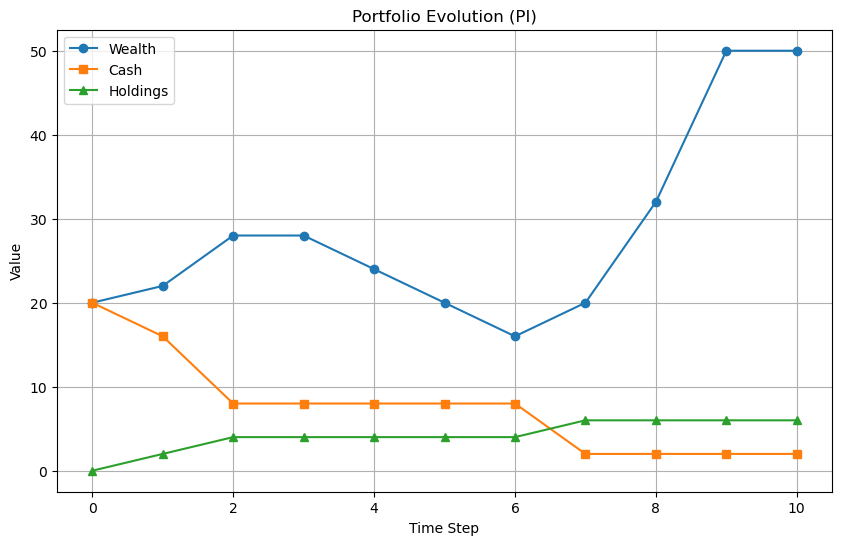

Route for VI
At state : (0, 20, 0), best action u can take is Buy 2
At state : (1, 16, 2), best action u can take is Buy 2
At state : (2, 8, 4), best action u can take is Hold
At state : (3, 8, 4), best action u can take is Hold
At state : (4, 8, 4), best action u can take is Hold
At state : (5, 8, 4), best action u can take is Hold
At state : (6, 8, 4), best action u can take is Buy 2
At state : (7, 2, 6), best action u can take is Hold
At state : (8, 2, 6), best action u can take is Hold
At state : (9, 2, 6), best action u can take is Hold
[VI] Final Wealth: 50
[VI] Total Reward: 0


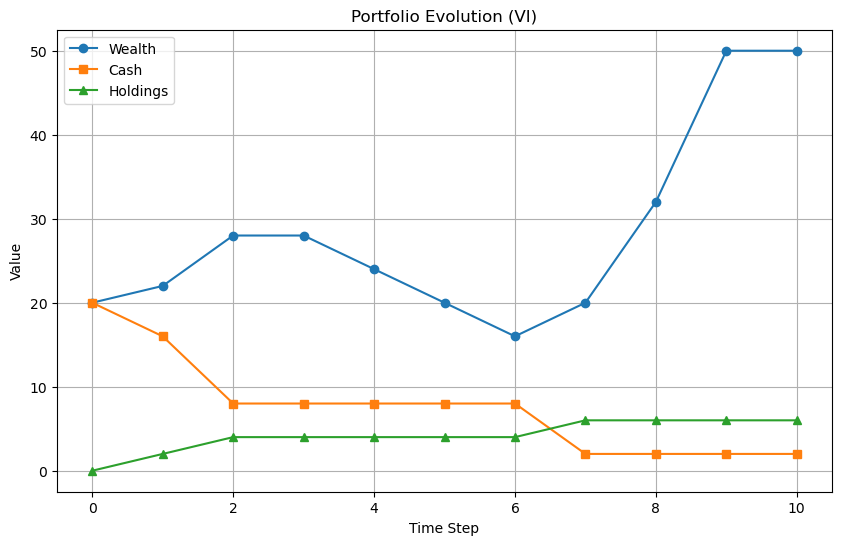

0 0
Running for prices : [2, 2, 2, 4, 2, 2, 4, 2, 2, 2]
Using Deterministic transitions
discount factor used is :  1.0
Maxm price one can hold : 1000
Start evaluating policies...policy_size :  (11, 1001, 11)
delta : 1020.0
delta : 0
Errors in policy : 31061
delta : 4.0
delta : 0
Errors in policy : 19318
delta : 0
Errors in policy : 0
The policy iteration took 3 iterations to converge
Maxm price one can hold : 1000
Start evaluating policies...policy_size :  (11, 1001, 11)
delta : 1020.0
delta : 0
The policy iteration took 2 iterations to converge
Number of differing elements: 0
True
VI value function mean: 511.5743595247728
PI value function mean: 511.5743595247728
Max abs difference: 0.0
Route for PI
At state : (0, 20, 0), best action u can take is Buy 2
At state : (1, 14, 2), best action u can take is Buy 2
At state : (2, 8, 4), best action u can take is Hold
At state : (3, 8, 4), best action u can take is Sell 2
At state : (4, 14, 2), best action u can take is Hold
At state : (5, 14,

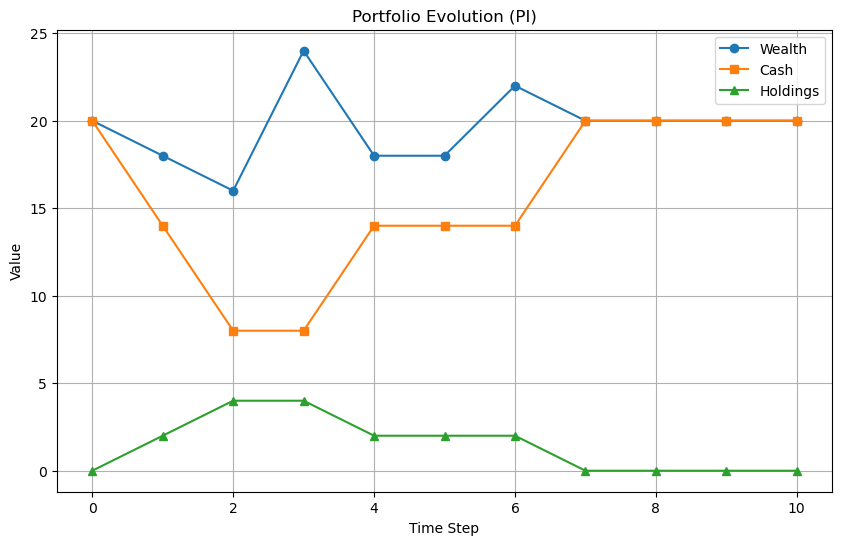

Route for VI
At state : (0, 20, 0), best action u can take is Buy 2
At state : (1, 14, 2), best action u can take is Buy 2
At state : (2, 8, 4), best action u can take is Hold
At state : (3, 8, 4), best action u can take is Sell 2
At state : (4, 14, 2), best action u can take is Hold
At state : (5, 14, 2), best action u can take is Hold
At state : (6, 14, 2), best action u can take is Sell 2
At state : (7, 20, 0), best action u can take is Hold
At state : (8, 20, 0), best action u can take is Hold
At state : (9, 20, 0), best action u can take is Hold
[VI] Final Wealth: 20
[VI] Total Reward: 0


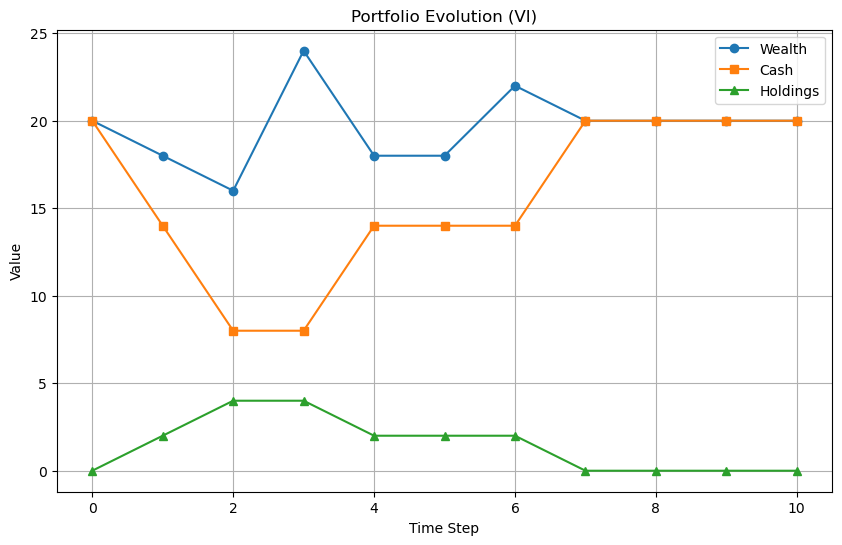

0 0
Running for prices : [4, 1, 4, 1, 4, 4, 4, 1, 1, 4]
Using Deterministic transitions
discount factor used is :  1.0
Maxm price one can hold : 1000
Start evaluating policies...policy_size :  (11, 1001, 11)
delta : 1040.0
delta : 0
Errors in policy : 51041
delta : 16.0
delta : 0
Errors in policy : 26146
delta : 11.0
delta : 0
Errors in policy : 19110
delta : 0
Errors in policy : 0
The policy iteration took 4 iterations to converge
Maxm price one can hold : 1000
Start evaluating policies...policy_size :  (11, 1001, 11)
delta : 1040.0
delta : 0
The policy iteration took 2 iterations to converge
Number of differing elements: 0
True
VI value function mean: 526.8380297388562
PI value function mean: 526.8380297388562
Max abs difference: 0.0
Route for PI
At state : (0, 20, 0), best action u can take is Hold
At state : (1, 20, 0), best action u can take is Buy 2
At state : (2, 16, 2), best action u can take is Hold
At state : (3, 16, 2), best action u can take is Buy 2
At state : (4, 12, 4), 

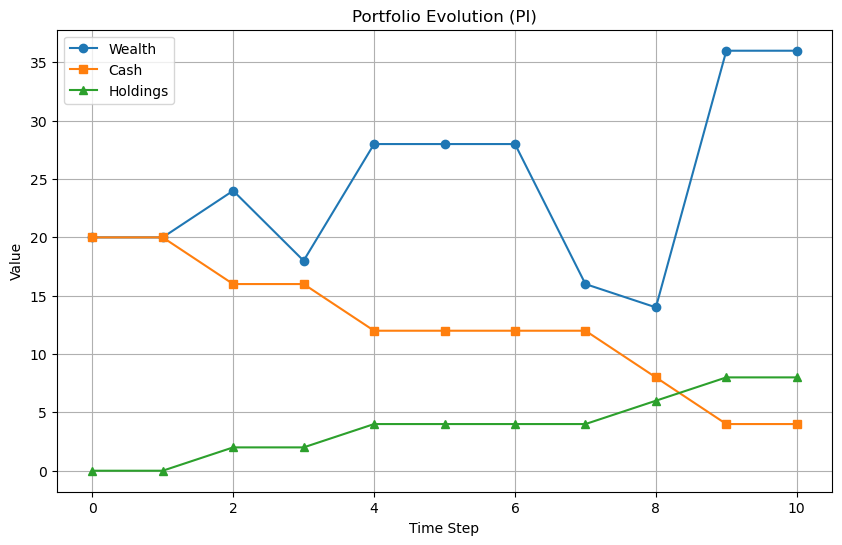

Route for VI
At state : (0, 20, 0), best action u can take is Hold
At state : (1, 20, 0), best action u can take is Buy 2
At state : (2, 16, 2), best action u can take is Hold
At state : (3, 16, 2), best action u can take is Buy 2
At state : (4, 12, 4), best action u can take is Hold
At state : (5, 12, 4), best action u can take is Hold
At state : (6, 12, 4), best action u can take is Hold
At state : (7, 12, 4), best action u can take is Buy 2
At state : (8, 8, 6), best action u can take is Buy 2
At state : (9, 4, 8), best action u can take is Hold
[VI] Final Wealth: 36
[VI] Total Reward: 0


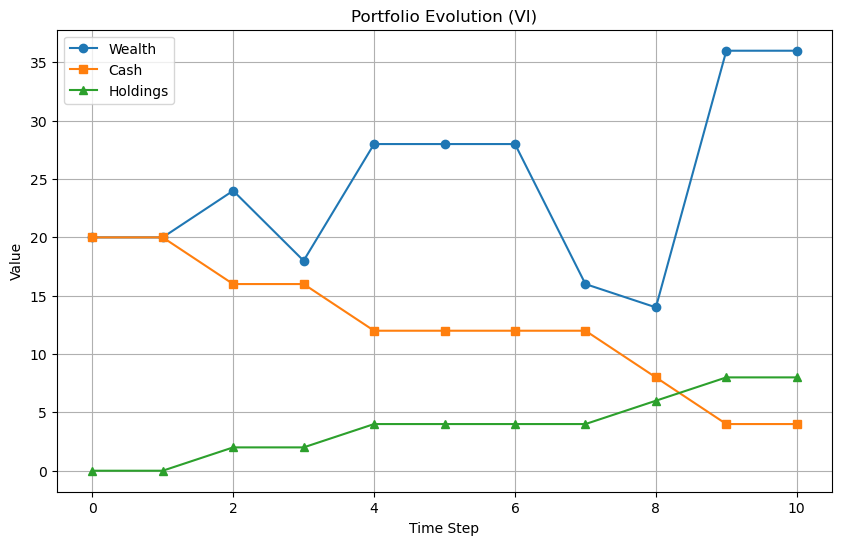

0 0
Running for Gamma = 0.999
Running for prices : [1, 3, 5, 5, 4, 3, 2, 3, 5, 8]
Using Deterministic transitions
discount factor used is :  0.999
Maxm price one can hold : 1000
Start evaluating policies...policy_size :  (11, 1001, 11)
delta : 1080.0
delta : 0
Errors in policy : 100721
delta : 35.78453928054
delta : 0
Errors in policy : 28811
delta : 17.856502993259028
delta : 0
Errors in policy : 18031
delta : 14.880419161049176
delta : 0
Errors in policy : 5163
delta : 7.920359041677983
delta : 0
Errors in policy : 11
delta : 0
Errors in policy : 0
The policy iteration took 6 iterations to converge
Maxm price one can hold : 1000
Start evaluating policies...policy_size :  (11, 1001, 11)
delta : 1080.0
delta : 0
The policy iteration took 2 iterations to converge
Number of differing elements: 0
True
VI value function mean: 551.3565203408673
PI value function mean: 551.3565203408673
Max abs difference: 0.0
Route for PI
At state : (0, 20, 0), best action u can take is Buy 2
At state : (1,

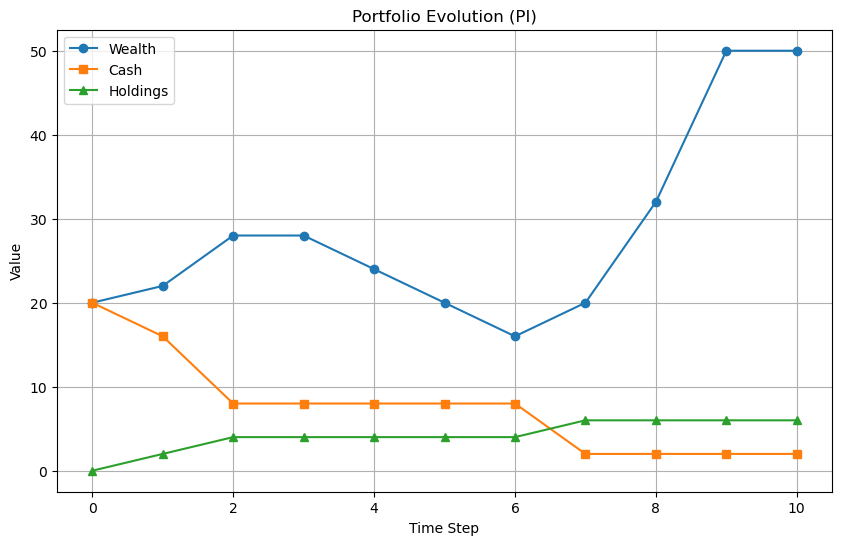

Route for VI
At state : (0, 20, 0), best action u can take is Buy 2
At state : (1, 16, 2), best action u can take is Buy 2
At state : (2, 8, 4), best action u can take is Hold
At state : (3, 8, 4), best action u can take is Hold
At state : (4, 8, 4), best action u can take is Hold
At state : (5, 8, 4), best action u can take is Hold
At state : (6, 8, 4), best action u can take is Buy 2
At state : (7, 2, 6), best action u can take is Hold
At state : (8, 2, 6), best action u can take is Hold
At state : (9, 2, 6), best action u can take is Hold
[VI] Final Wealth: 50
[VI] Total Reward: 0


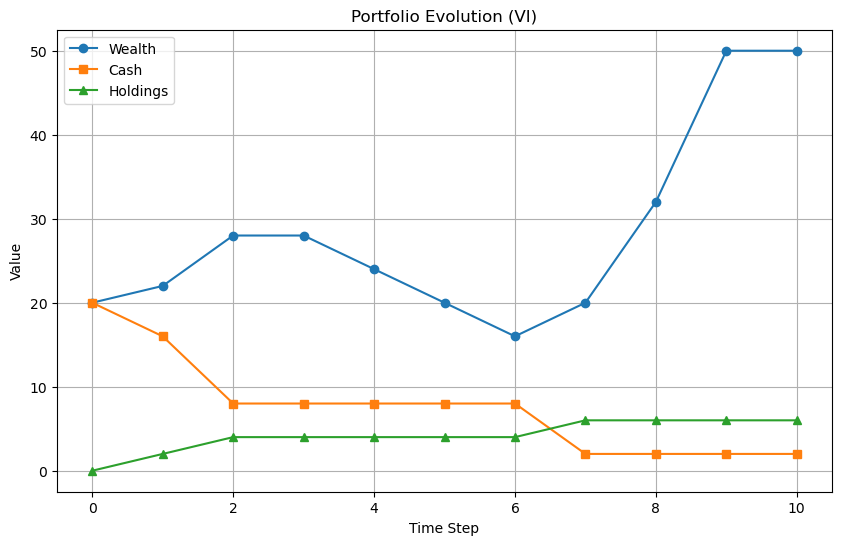

0 0
Running for prices : [2, 2, 2, 4, 2, 2, 4, 2, 2, 2]
Using Deterministic transitions
discount factor used is :  0.999
Maxm price one can hold : 1000
Start evaluating policies...policy_size :  (11, 1001, 11)
delta : 1020.0
delta : 0
Errors in policy : 31061
delta : 3.9720838601402875
delta : 0
Errors in policy : 19318
delta : 0
Errors in policy : 0
The policy iteration took 3 iterations to converge
Maxm price one can hold : 1000
Start evaluating policies...policy_size :  (11, 1001, 11)
delta : 1020.0
delta : 0
The policy iteration took 2 iterations to converge
Number of differing elements: 0
True
VI value function mean: 509.02026561525815
PI value function mean: 509.02026561525815
Max abs difference: 0.0
Route for PI
At state : (0, 20, 0), best action u can take is Buy 2
At state : (1, 14, 2), best action u can take is Buy 2
At state : (2, 8, 4), best action u can take is Hold
At state : (3, 8, 4), best action u can take is Sell 2
At state : (4, 14, 2), best action u can take is Hold

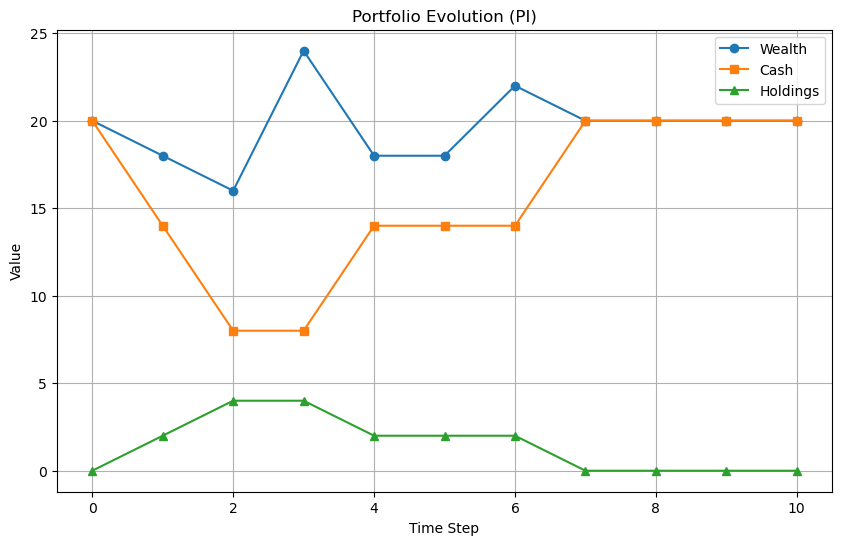

Route for VI
At state : (0, 20, 0), best action u can take is Buy 2
At state : (1, 14, 2), best action u can take is Buy 2
At state : (2, 8, 4), best action u can take is Hold
At state : (3, 8, 4), best action u can take is Sell 2
At state : (4, 14, 2), best action u can take is Hold
At state : (5, 14, 2), best action u can take is Hold
At state : (6, 14, 2), best action u can take is Sell 2
At state : (7, 20, 0), best action u can take is Hold
At state : (8, 20, 0), best action u can take is Hold
At state : (9, 20, 0), best action u can take is Hold
[VI] Final Wealth: 20
[VI] Total Reward: 0


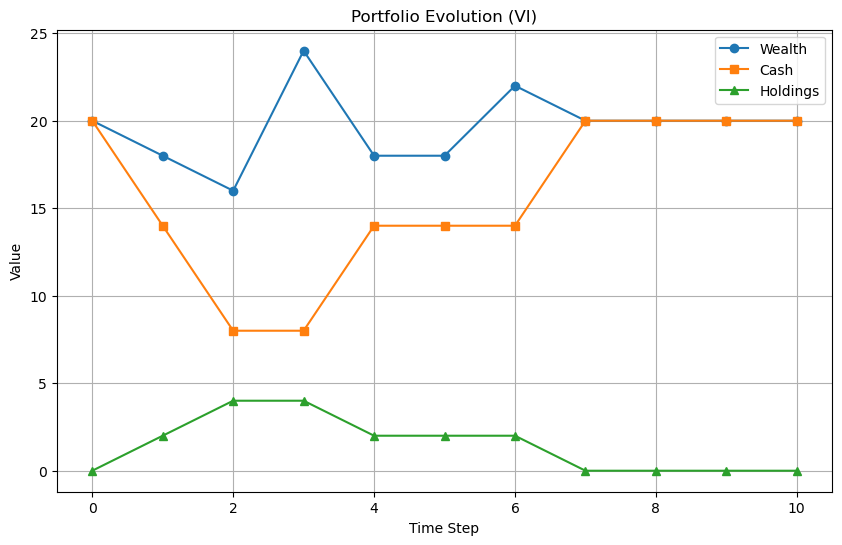

0 0
Running for prices : [4, 1, 4, 1, 4, 4, 4, 1, 1, 4]
Using Deterministic transitions
discount factor used is :  0.999
Maxm price one can hold : 1000
Start evaluating policies...policy_size :  (11, 1001, 11)
delta : 1040.0
delta : 0
Errors in policy : 51041
delta : 15.856574658014324
delta : 0
Errors in policy : 26146
delta : 10.890493682307236
delta : 0
Errors in policy : 19110
delta : 0
Errors in policy : 0
The policy iteration took 4 iterations to converge
Maxm price one can hold : 1000
Start evaluating policies...policy_size :  (11, 1001, 11)
delta : 1040.0
delta : 0
The policy iteration took 2 iterations to converge
Number of differing elements: 0
True
VI value function mean: 524.1990308446867
PI value function mean: 524.1990308446867
Max abs difference: 0.0
Route for PI
At state : (0, 20, 0), best action u can take is Hold
At state : (1, 20, 0), best action u can take is Buy 2
At state : (2, 16, 2), best action u can take is Hold
At state : (3, 16, 2), best action u can take is

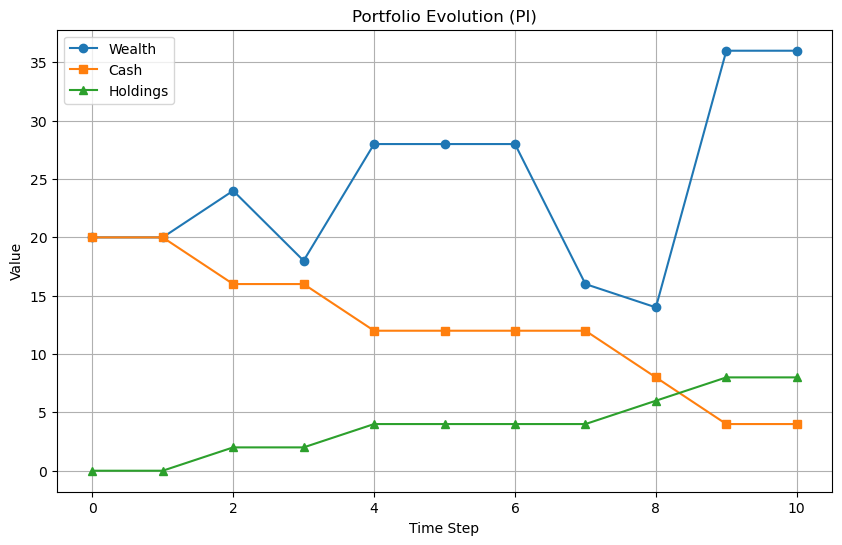

Route for VI
At state : (0, 20, 0), best action u can take is Hold
At state : (1, 20, 0), best action u can take is Buy 2
At state : (2, 16, 2), best action u can take is Hold
At state : (3, 16, 2), best action u can take is Buy 2
At state : (4, 12, 4), best action u can take is Hold
At state : (5, 12, 4), best action u can take is Hold
At state : (6, 12, 4), best action u can take is Hold
At state : (7, 12, 4), best action u can take is Buy 2
At state : (8, 8, 6), best action u can take is Buy 2
At state : (9, 4, 8), best action u can take is Hold
[VI] Final Wealth: 36
[VI] Total Reward: 0


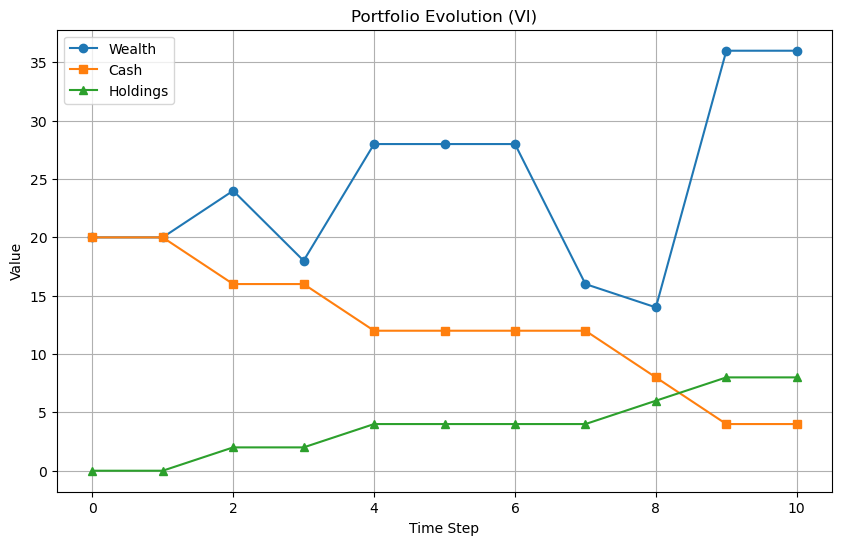

0 0


In [5]:
priceList = [
    [1, 3, 5, 5 , 4, 3, 2, 3, 5, 8],
    [2, 2, 2, 4 ,2, 2, 4, 2, 2, 2],
    [4, 1, 4, 1 ,4, 4, 4, 1, 1, 4]
]
gammas = [1.0 , 0.999]

for gamma in gammas:    
    print(f"Running for Gamma = {gamma}")
    
    for prices in priceList:
        print(f"Running for prices : {prices}")
        run(prices = prices, gamma = gamma)

Asset prices not found. Using default prices. Please check your arguments!
Setting price variance to 1
discount factor used is :  1.0
Running for prices :  [3 2 3 4 5 8 6 6 4 5]
Maxm price one can hold : 1000
Start evaluating policies...policy_size :  (11, 1001, 11)
delta : 1050.0
delta : 0
Errors in policy : 70841
delta : 12.0
delta : 0
Errors in policy : 5163
delta : 5.0
delta : 0
Errors in policy : 5
delta : 1.0
delta : 0
Errors in policy : 1
delta : 0
Errors in policy : 0
The policy iteration took 5 iterations to converge
Maxm price one can hold : 1000
Start evaluating policies...policy_size :  (11, 1001, 11)
delta : 1050.0
delta : 0
The policy iteration took 2 iterations to converge
Number of differing elements: 0
True
VI value function mean: 528.1874571709283
PI value function mean: 528.1874571709283
Max abs difference: 0.0
Route for PI
At state : (0, 20, 0), best action u can take is Buy 2
At state : (1, 12, 2), best action u can take is Buy 2
At state : (2, 6, 4), best action u

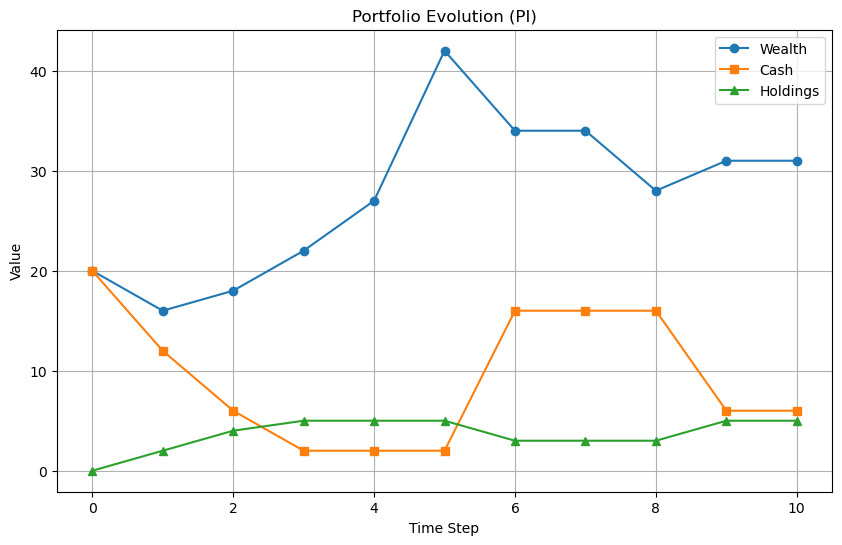

Route for VI
At state : (0, 20, 0), best action u can take is Buy 2
At state : (1, 12, 2), best action u can take is Buy 2
At state : (2, 6, 4), best action u can take is Buy 1
At state : (3, 2, 5), best action u can take is Hold
At state : (4, 2, 5), best action u can take is Hold
At state : (5, 2, 5), best action u can take is Sell 2
At state : (6, 16, 3), best action u can take is Hold
At state : (7, 16, 3), best action u can take is Hold
At state : (8, 16, 3), best action u can take is Buy 2
At state : (9, 6, 5), best action u can take is Hold
[VI] Final Wealth: 31
[VI] Total Reward: 0


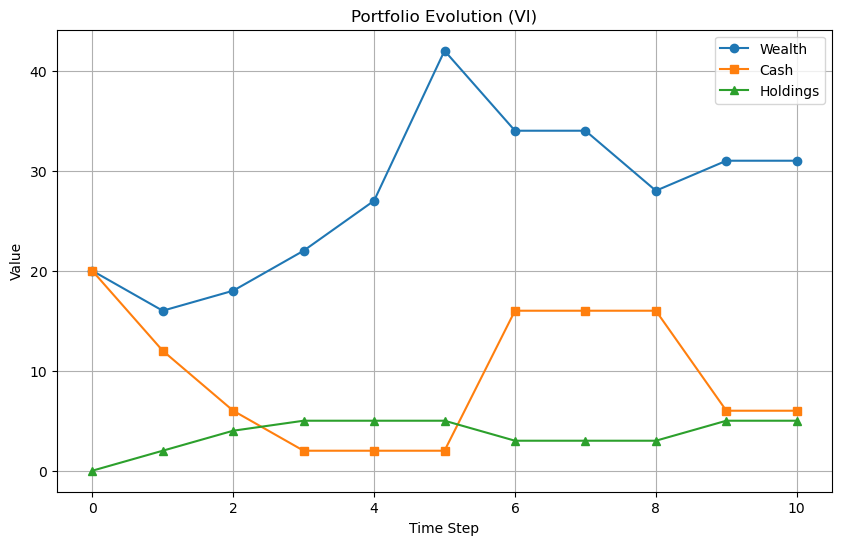

0 0


In [22]:
run(variance = 1, threshold = 1e-2)